In [19]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [20]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    results = np.asarray(results)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [21]:
train_data = vectorize_sequences(train_data)

### Creating a benchmark - original model

In [22]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [23]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [24]:
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

2023-11-05 03:40:54.920405: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - 5s 117ms/step - loss: 0.5302 - accuracy: 0.7759 - val_loss: 0.4402 - val_accuracy: 0.8250
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3341 - accuracy: 0.8923 - val_loss: 0.3213 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2454 - accuracy: 0.9207 - val_loss: 0.3181 - val_accuracy: 0.8705
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1976 - accuracy: 0.9353 - val_loss: 0.2788 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1649 - accuracy: 0.9471 - val_loss: 0.2892 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1394 - accuracy: 0.9543 - val_loss: 0.2854 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1197 - accuracy: 0.9634 - val_loss: 0.3467 - val_accuracy: 0.8674
Epoch 8/20
3

### Creating smaller version of the model

In [25]:
model = keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [27]:
history_smaller = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 6s 179ms/step - loss: 0.5614 - accuracy: 0.7820 - val_loss: 0.4719 - val_accuracy: 0.8339
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3979 - accuracy: 0.8921 - val_loss: 0.3789 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3158 - accuracy: 0.9111 - val_loss: 0.3322 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2630 - accuracy: 0.9261 - val_loss: 0.3042 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2260 - accuracy: 0.9339 - val_loss: 0.2880 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1986 - accuracy: 0.9433 - val_loss: 0.2845 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1775 - accuracy: 0.9480 - val_loss: 0.2758 - val_accuracy: 0.8915
Epoch 8/20
3

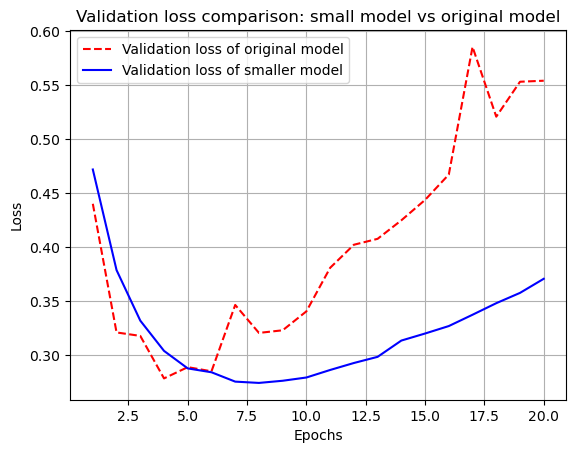

In [33]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.plot(epochs, history_original.history["val_loss"], "r--", label="Validation loss of original model")
plt.plot(epochs, history_smaller.history["val_loss"], "b", label="Validation loss of smaller model")
plt.title("Validation loss comparison: small model vs original model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

### Creating a larger version of the model

In [35]:
model = keras.Sequential([
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [37]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [38]:
history_larger = model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 20s 632ms/step - loss: 0.6076 - accuracy: 0.6913 - val_loss: 0.3856 - val_accuracy: 0.8404
Epoch 2/20
30/30 [==============================] - 11s 354ms/step - loss: 0.3312 - accuracy: 0.8606 - val_loss: 0.3269 - val_accuracy: 0.8635
Epoch 3/20
30/30 [==============================] - 10s 347ms/step - loss: 0.2533 - accuracy: 0.8987 - val_loss: 0.5646 - val_accuracy: 0.7884
Epoch 4/20
30/30 [==============================] - 10s 348ms/step - loss: 0.1947 - accuracy: 0.9243 - val_loss: 0.2804 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 11s 359ms/step - loss: 0.1411 - accuracy: 0.9474 - val_loss: 0.2927 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 10s 348ms/step - loss: 0.0961 - accuracy: 0.9644 - val_loss: 1.1689 - val_accuracy: 0.6887
Epoch 7/20
30/30 [==============================] - 11s 361ms/step - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.9367 - val_accuracy: 0.7599

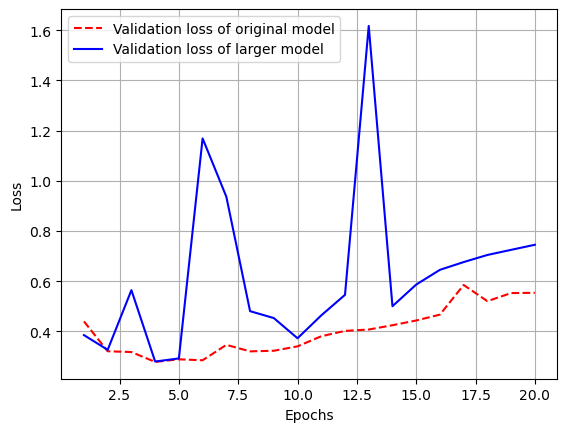

In [39]:
plt.plot(epochs, history_original.history["val_loss"], "r--", label="Validation loss of original model")
plt.plot(epochs, history_larger.history["val_loss"], "b", label="Validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

### Adding L2 weight regularization to the original model

In [40]:
model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.002), activation="relu"),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.002), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [46]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.Accuracy()]
)

In [47]:
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 9s 246ms/step - loss: 0.6294 - accuracy: 0.0000e+00 - val_loss: 0.5035 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4384 - accuracy: 0.0000e+00 - val_loss: 0.4279 - val_accuracy: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3549 - accuracy: 0.0000e+00 - val_loss: 0.3742 - val_accuracy: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3104 - accuracy: 0.0000e+00 - val_loss: 0.3619 - val_accuracy: 0.0000e+00
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2870 - accuracy: 0.0000e+00 - val_loss: 0.3671 - val_accuracy: 0.0000e+00
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2724 - accuracy: 0.0000e+00 - val_loss: 0.3595 - val_accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2596 - accuracy: 0.0000e+00 - 

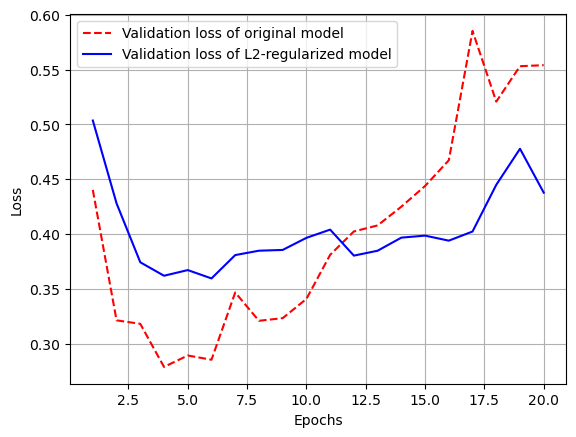

In [48]:
plt.plot(epochs, history_original.history["val_loss"], "r--", label="Validation loss of original model")
plt.plot(epochs, history_l2_reg.history["val_loss"], "b", label="Validation loss of L2-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

### Adding dropout layers to the original model

In [49]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [52]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.Accuracy()]
)

In [53]:
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 14s 248ms/step - loss: 0.6469 - accuracy: 0.0000e+00 - val_loss: 0.5583 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5519 - accuracy: 0.0000e+00 - val_loss: 0.4695 - val_accuracy: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4819 - accuracy: 0.0000e+00 - val_loss: 0.3910 - val_accuracy: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4135 - accuracy: 6.6667e-05 - val_loss: 0.3331 - val_accuracy: 0.0000e+00
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3632 - accuracy: 3.3333e-04 - val_loss: 0.3042 - val_accuracy: 0.0000e+00
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3224 - accuracy: 7.3333e-04 - val_loss: 0.2886 - val_accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2900 - accuracy: 0.0019 - val

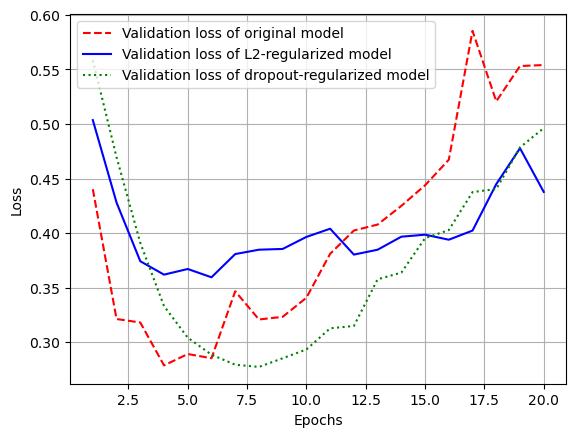

In [55]:
plt.plot(epochs, history_original.history["val_loss"], "r--", label="Validation loss of original model")
plt.plot(epochs, history_l2_reg.history["val_loss"], "b", label="Validation loss of L2-regularized model")
plt.plot(epochs, history_dropout.history["val_loss"], "g:", label="Validation loss of dropout-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()